In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
specimen_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2022.csv')
specimen_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2023.csv')
regimens_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2022.csv')
regimens_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2023.csv')
patients_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2022.csv')
patients_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2023.csv')
patients_nig = pd.read_csv('Tuberculosis files/TB_Data_Nigeria.csv')

In [4]:
patients_2022_copy = patients_2022.copy()
patients_2023_copy = patients_2023.copy()

specimens_2022_copy = specimen_2022.copy()
specimens_2023_copy = specimen_2022.copy()

regimens_2022_copy = regimens_2022.copy()
regimens_2023_copy = regimens_2023.copy()

patients_nig_copy = patients_nig.copy()

In [5]:
patients_2022_copy.info()
patients_column_list_2022 = patients_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Columns: 204 entries, condition_id to qure_atelectasis
dtypes: float64(6), int64(5), object(193)
memory usage: 10.3+ MB


In [6]:
patients_column_list_2022
patients_column_list_needed = ['patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'status']

patients_2022_new = patients_2022_copy[patients_column_list_needed]

patients_2022_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,status
0,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
1,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,final
2,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,final
3,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,final
4,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,4195,2019,58,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,00ac6a80-f27f-41c2-8c03-7d86d53d50db,8872,2019,33,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,New,A15.1,Poly DR,16.2,Pulmonary,1,final
6592,a32e3d5d-4e08-4461-8082-e850b1f7bdfe,9902,2021,17,Male,Ukraine,Basic school (incl. primary),Unemployed,NaN,NaN,New,A19.8,Sensitive,14.3,Pulmonary,1,final
6593,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,final
6594,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,final


In [7]:
patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_of_daily_contacts'].sum()/len(patients_2022_new))
patients_2022_new['bmi'] = patients_2022_new['bmi'].fillna(patients_2022_new['bmi'].sum()/len(patients_2022_new))

patients_2022_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                6596 non-null   object 
 1   identifier                6596 non-null   int64  
 2   registration_date         6596 non-null   int64  
 3   age_of_onset              6596 non-null   int64  
 4   gender                    6596 non-null   object 
 5   country                   6596 non-null   object 
 6   education                 6596 non-null   object 
 7   employment                6596 non-null   object 
 8   number_of_children        6596 non-null   float64
 9   number_of_daily_contacts  6596 non-null   float64
 10  case_definition           6596 non-null   object 
 11  diagnosis_code            6596 non-null   object 
 12  type_of_resistance        6596 non-null   object 
 13  bmi                       6596 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\3297333353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\3297333353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_

In [8]:
patients_2023_new = patients_2023_copy[patients_column_list_needed]

patients_2023_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,status
0,3676197e-6bd7-4c41-8bb0-de5889997b32,8277,2019,40,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
1,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,final
2,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,final
3,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,final
4,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,final
8813,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,final
8814,b03880ea-a373-4530-9959-657dff0be22d,9446,2021,37,Male,Ukraine,Not Reported,Unemployed,NaN,NaN,New,A15.0,MDR non XDR,23.8,Pulmonary,1,final
8815,3efbbff9-f475-4d40-9dce-c92aac275f44,8904,2021,44,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,Chronic TB,A15.0,MDR non XDR,16.7,Pulmonary,1,final


In [9]:
patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(patients_2023_new['number_of_children'].sum()/len(patients_2023_new))
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(patients_2023_new['number_of_daily_contacts'].sum()/len(patients_2023_new))
patients_2023_new['bmi'] = patients_2023_new['bmi'].fillna(patients_2023_new['bmi'].sum()/len(patients_2023_new))

patients_2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                8817 non-null   object 
 1   identifier                8817 non-null   int64  
 2   registration_date         8817 non-null   int64  
 3   age_of_onset              8817 non-null   int64  
 4   gender                    8817 non-null   object 
 5   country                   8817 non-null   object 
 6   education                 8817 non-null   object 
 7   employment                8817 non-null   object 
 8   number_of_children        8817 non-null   float64
 9   number_of_daily_contacts  8817 non-null   float64
 10  case_definition           8817 non-null   object 
 11  diagnosis_code            8817 non-null   object 
 12  type_of_resistance        8817 non-null   object 
 13  bmi                       8817 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\885934203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(patients_2023_new['number_of_children'].sum()/len(patients_2023_new))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\885934203.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(patients_2023_new['number_of

In [10]:
regimens_2022_copy.info()
regimens_column_list_2022 = regimens_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  9644 non-null   object 
 1   condition_id                9644 non-null   object 
 2   period_start                9644 non-null   float64
 3   period_end                  8677 non-null   float64
 4   period_span                 8677 non-null   float64
 5   outcome_cd                  9643 non-null   object 
 6   activities_period_start     9644 non-null   float64
 7   activities_period_end       8896 non-null   float64
 8   activities_statusreason_cd  7382 non-null   object 
 9   regimen_drug                9644 non-null   object 
 10  dose                        30 non-null     float64
 11  collected                   30 non-null     float64
 12  reinfusioned                30 non-null     float64
dtypes: float64(8), object(5)
memory u

In [11]:
regimens_column_list_2022
regimens_column_list_needed = ['patient_id',
 'condition_id',
 'period_span',
 'regimen_drug',
 'outcome_cd']

regimens_2022_new = regimens_2022_copy[regimens_column_list_needed]

regimens_2022_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
4,0046f70e-395f-40bb-b3a7-57b3fe3e97d1,ff562387-8969-4e27-bdd1-3146f45ea588,588.0,"{Cfz,Cs,Lzd,Mfx,Pto,Z}",completed
...,...,...,...,...,...
9639,ffcdbf6f-53a3-453a-9582-8725ed4234f3,239bdca1-a72e-4ecb-a9d9-97900dfd1759,609.0,"{Cs,Lfx,Pas,Pto}",completed
9640,ffd914a0-89dd-4a7e-a959-0342b3c43e20,38d66fbf-f2cf-49a8-9091-c76600af364b,188.0,"{Bdq,Cfz,Cs,Dld,Lzd}",failure
9641,ffdf3b67-bba2-4d0b-937d-fae6b75d4f63,a1aa80b9-bb80-40ef-9136-4fcc0580795f,278.0,"{E,H,Lfx,R,Z}",completed
9642,fff9f70e-2738-43c9-b42d-0c2139da52b9,728694fa-f21a-4055-b1f1-1580b1a9cf8a,38.0,"{Cm,E,H}",died


In [12]:
regimens_2022_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\3917202655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2022_new.fillna(0,inplace=True)


In [13]:
regimens_2023_new = regimens_2023_copy[regimens_column_list_needed]

regimens_2023_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0027b572-338f-443e-b281-a0a0a2bbcda1,fc4a8d34-fa79-45af-93fa-7e2b9c290181,183.0,"{E,H,R,Z}",completed
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
4,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
...,...,...,...,...,...
12780,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Cfz,Cm,E,H,Mfx,Pto,Z}",cured
12781,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Amx/Clv,Bdq,Cfz,Ipm/Cln,Lzd,Trd}",cured
12782,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Bdq,Cfz,Lzd}",cured
12783,ffff7e78-14af-415a-8f2e-82ae35e9f499,d593d898-ba1e-4b8d-8f3c-95129253b01b,272.0,"{Bdq,Cfz,Cs,Lfx,Lzd}",cured


In [14]:
regimens_2023_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_24600\3115858346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2023_new.fillna(0,inplace=True)


In [15]:
patients_total_2022 = pd.merge(patients_2022_new, regimens_2022_new, on='patient_id')

In [16]:
patients_total_2022['outcome_cd_state'] = patients_total_2022['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ('still on treatment' if x == 'stillOnTreatment' \
               else ("died" if x == 'died' else 'others')))

In [17]:
patients_total_2023 = pd.merge(patients_2023_new, regimens_2023_new, on='patient_id')

In [18]:
patients_total_2023['outcome_cd_state'] = patients_total_2023['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ('still on treatment' if x == 'stillOnTreatment' \
               else ("died" if x == 'died' else 'others')))

In [19]:
patients_total_2022['year'] = 2022
patients_total_2023['year'] = 2023

In [20]:
patients_total = pd.concat([patients_total_2022, patients_total_2023])

In [21]:
patients_total_cured_died = patients_total[patients_total['outcome_cd'].isin(['cured', 'died'])]

<AxesSubplot:>

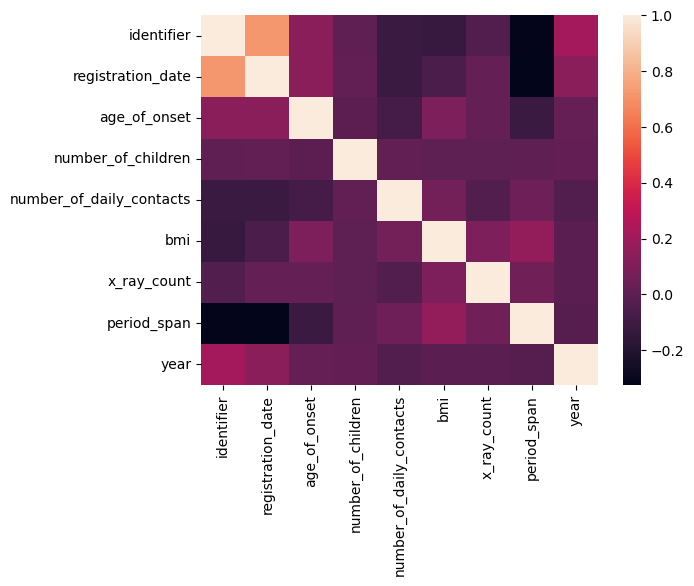

In [24]:
sns.heatmap(patients_total_cured_died.corr())